<a href="https://colab.research.google.com/github/yunyoungwoo/2024S-Ajou-ML-FP/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Colab 환경에 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
import os
import json
import torch
import random
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.io import read_image
from sklearn.preprocessing import OneHotEncoder
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

In [3]:
# 디렉토리 경로 설정
training_directory = '/content/drive/MyDrive/Colab Notebooks/Training'
validation_directory = '/content/drive/MyDrive/Colab Notebooks/Validation'

In [4]:
# 이미지 및 라벨 폴더 경로 설정
training_image_directory = os.path.join(training_directory, 'image')
training_label_directory = os.path.join(training_directory, 'label')
validation_image_directory = os.path.join(validation_directory, 'image')
validation_label_directory = os.path.join(validation_directory, 'label')

In [5]:
print(training_image_directory)
print(training_label_directory)
print(validation_image_directory)
print(validation_label_directory)

/content/drive/MyDrive/Colab Notebooks/Training/image
/content/drive/MyDrive/Colab Notebooks/Training/label
/content/drive/MyDrive/Colab Notebooks/Validation/image
/content/drive/MyDrive/Colab Notebooks/Validation/label


In [7]:
# 이미지 및 라벨 파일 이름 리스트 생성
training_image_list = os.listdir(training_image_directory)
training_label_list = os.listdir(training_label_directory)
validation_image_list = os.listdir(validation_image_directory)
validation_label_list = os.listdir(validation_label_directory)

In [8]:
# 리스트를 파일 이름 순서대로 정렬
training_image_list.sort()
training_label_list.sort()
validation_image_list.sort()
validation_label_list.sort()

In [9]:
print(training_image_list)
print(training_label_list)
print(validation_image_list)
print(validation_label_list)

['0013_A2LEBJJDE00060O_1602911366731_2_TH.jpg', '0013_A2LEBJJDE00060O_1603096385510_2_TH.jpg', '0013_A2LEBJJDE00060O_1603341963457_2_TH.jpg', '0013_A2LEBJJDE00060O_1603341963457_4_LH.jpg', '0013_A2LEBJJDE00060O_1603341963457_5_RH.jpg', '0013_A2LEBJJDE00060O_1603341963457_6_BH.jpg', '0013_A2LEBJJDE00060O_1603942897337_3_TH.jpg', '0013_A2LEBJJDE00060O_1603942897337_5_RH.jpg', '0013_A2LEBJJDE00060O_1603942897337_6_BH.jpg', '0013_A2LEBJJDE00060O_1603942963211_3_TH.jpg', '0013_A2LEBJJDE00060O_1603942974997_4_LH.jpg', '0013_A2LEBJJDE00060O_1603943094656_4_LH.jpg', '0013_A2LEBJJDE00060O_1603943094656_5_RH.jpg', '0013_A2LEBJJDE00060O_1603943094656_6_BH.jpg', '0013_A2LEBJJDE00060O_1603943124989_5_RH.jpg', '0013_A2LEBJJDE00060O_1604372029042_4_LH.jpg', '0013_A2LEBJJDE00060O_1604372042927_5_RH.jpg', '0013_A2LEBJJDE00060O_1604372042927_6_BH.jpg', '0013_A2LEBJJDE00060O_1604540048368_3_TH.jpg', '0013_A2LEBJJDE00060O_1604540048368_4_LH.jpg', '0013_A2LEBJJDE00060O_1604540048368_5_RH.jpg', '0013_A2LEBJ

In [10]:
# training_image_list와 training_label_list의 길이
num_files = len(training_image_list)
print(num_files)

# 랜덤하게 선택할 인덱스 리스트 생성
random_indexes = random.sample(range(num_files), 1800)

# 랜덤하게 선택된 인덱스에 해당하는 이미지와 라벨 파일 이름 추출
random_training_image_list = [training_image_list[i] for i in random_indexes]
random_training_label_list = [training_label_list[i] for i in random_indexes]
print(len(random_training_image_list))
print(len(random_training_label_list))

# 결과 출력
print("Randomly selected training images:", random_training_image_list)
print("Randomly selected training labels:", random_training_label_list)


18513
1800
1800
Randomly selected training images: ['2585_A2LEBJJDE001302_1602909223859_4_LH.jpg', '9414_A2LEBJJDE00033L_1605579124132_3_TH.jpg', '4659_A2LEBJJDE001349_1604824004405_2_TH.jpg', '2404_A2LEBJJDE000175_1605847491863_3_TH.jpg', '3275_A2LEBJJDE001766_1605488713607_4_LH.jpg', '7338_A2LEBJJDE00006I_1602655627045_2_TH.jpg', '2637_A2LEBJJDE00099D_1602837128371_4_LH.jpg', '7168_A2LEBJJDE00124F_1605930490195_5_RH.jpg', '7216_A2LEBJJDE000125_1602574080762_5_RH.jpg', '3339_A2LEBJJDE00057G_1602560031528_5_RH.jpg', '5436_A2LEBJJDE00098K_1603691702493_2_TH.jpg', '2032_A2LEBJJDE00152B_1605923915500_3_TH.jpg', '3977_A2LEBJJDE00029K_1602749229528_2_TH.jpg', '1798_A2LEBJJDE000539_1602558750923_5_RH.jpg', '2469_A2LEBJJDE00019Q_1605160968233_6_BH.jpg', '2404_A2LEBJJDE00020D_1604134629715_4_LH.jpg', '0131_A2LEBJJDE00166C_1604645589854_3_TH.jpg', '5569_A2LEBJJDE001211_1604738638620_6_BH.jpg', '2637_A2LEBJJDE00099D_1602579602808_3_TH.jpg', '4070_A2LEBJJDE000266_1605773042464_3_TH.jpg', '2585_A2

In [11]:
# validation_image_list와 validation_label_list의 길이
num_files = len(validation_image_list)
print(num_files)

# 랜덤하게 선택할 인덱스 리스트 생성
random_indexes = random.sample(range(num_files), 360)

# 랜덤하게 선택된 인덱스에 해당하는 이미지와 라벨 파일 이름 추출
random_validation_image_list = [validation_image_list[i] for i in random_indexes]
random_validation_label_list = [validation_label_list[i] for i in random_indexes]
print(len(random_validation_image_list))
print(len(random_validation_label_list))

# 결과 출력
print("Randomly selected validation images:", random_validation_image_list)
print("Randomly selected validation labels:", random_validation_label_list)

5288
360
360
Randomly selected validation images: ['4015_A2LEBJJDE00150P_1606699106717_3_TH.jpg', '2404_A2LEBJJDE000175_1606880367227_3_TH.jpg', '2278_A2LEBJJDE00181Z_1606653269598_5_RH.jpg', '6440_A2LEBJJDE001352_1607327793596_5_RH.jpg', '3216_A1LCAIHDH00006J_1607657494647_4_LH.jpg', '8111_A2LEBJJDE00112Z_1603078318422_3_TH.jpg', '8896_A2LEBJJDE001807_1607154094846_3_TH.jpg', '6440_A2LEBJJDE001352_1606890187925_5_RH.jpg', '5436_A2LEBJJDE00098K_1607067376872_2_TH.jpg', '6570_A2LEBJJDE001675_1607830769658_4_LH.jpg', '5305_A2LEBJJDE00122T_1606552377204_6_BH.jpg', '9874_A2LEBJJDE00123M_1607145177557_2_TH.jpg', '1069_A2LEBJJDE00094D_1606461468041_3_TH.jpg', '4162_A2LEBJJDE00013X_1607652749194_4_LH.jpg', '0013_A2LEBJJDE00060O_1607142499980_5_RH.jpg', '5569_A2LEBJJDE001211_1607295458369_6_BH.jpg', '7851_A2LEBJJDE00074P_1606739776889_5_RH.jpg', '2032_A2LEBJJDE00152B_1606625629144_5_RH.jpg', '2278_A2LEBJJDE00181Z_1606655867561_2_TH.jpg', '7366_A2LEBJJDE00088Q_1607648557486_5_RH.jpg', '7366_A2L

In [12]:
# 확장자를 제거한 파일 이름을 비교하는 함수
def compare_lists_without_extension(list1, list2):
    # 두 리스트의 길이가 다르면 다른 것으로 간주
    if len(list1) != len(list2):
        return False

    # 각 요소를 비교하여 다른 것이 있으면 False 반환
    for item1, item2 in zip(list1, list2):
        # 확장자를 제거하여 비교
        name1, _ = os.path.splitext(item1)
        name2, _ = os.path.splitext(item2)
        if name1 != name2:
            return False

    # 모든 요소가 같으면 True 반환
    return True

# 두 리스트 비교
result1 = compare_lists_without_extension(random_training_image_list, random_training_label_list)
result2 = compare_lists_without_extension(random_validation_image_list, random_validation_label_list)

# 결과 출력
if result1:
    print("두 리스트는 같습니다.")
else:
    print("두 리스트는 다릅니다.")

if result2:
    print("두 리스트는 같습니다.")
else:
    print("두 리스트는 다릅니다.")

두 리스트는 같습니다.
두 리스트는 같습니다.


In [13]:
# validation 데이터셋을 validation과 test로 분리
val_images, test_images, val_labels, test_labels = train_test_split(
    random_validation_image_list, random_validation_label_list, test_size=0.5, random_state=42
)

In [14]:
print(val_images)
print(val_labels)
print(test_images)
print(test_labels)

['1981_A2LEBJJDE001493_1606638277742_4_LH.jpg', '9527_A2LEBJJDE00110E_1606733122767_6_BH.jpg', '1981_A2LEBJJDE001493_1606635160829_3_TH.jpg', '6570_A2LEBJJDE001675_1607830837849_2_TH.jpg', '8896_A2LEBJJDE001807_1607300491961_6_BH.jpg', '2326_A2LEBJJDE00037S_1606354636197_3_TH.jpg', '1221_A1LCAIHDH00009X_1608009022913_4_LH.jpg', '7851_A2LEBJJDE00074P_1607148959668_2_TH.jpg', '4795_A2LEBJJDE00113S_1607751145756_4_LH.jpg', '3216_A1LCAIHDH00006J_1607662960951_3_TH.jpg', '0617_A2LEBJJDE000815_1606613819548_3_TH.jpg', '8366_A2LEBJJDE00196T_1605154223008_6_BH.jpg', '4162_A2LEBJJDE00013X_1607652548231_3_TH.jpg', '6367_A2LEBJJDE00038L_1606898158950_3_TH.jpg', '5415_A2LEBJJDE00032S_1606379016098_5_RH.jpg', '2278_A2LEBJJDE00181Z_1606653269598_5_RH.jpg', '9338_A2LEBJJDE00101D_1606628644041_4_LH.jpg', '0617_A2LEBJJDE000815_1606648231485_4_LH.jpg', '3977_A2LEBJJDE00161C_1606442063074_2_TH.jpg', '4795_A2LEBJJDE00113S_1606454949331_6_BH.jpg', '8212_A2LEBJJDE00070I_1604717842848_2_TH.jpg', '7366_A2LEBJ

In [16]:
def resize_random_images(original_image_directory, resized_image_directory, random_image_list):

    # 랜덤하게 선택된 이미지 리스트 생성
    target_width = 224
    target_height = 224

    # 랜덤하게 선택된 이미지 리스트에 대해 반복
    for image_filename in random_image_list:
        # 이미지 경로 생성
        image_path = os.path.join(original_image_directory, image_filename)

        # 이미지 열기
        image = Image.open(image_path)

        # 이미지 리사이즈
        resized_image = image.resize((target_width, target_height))

        # 새로운 파일 경로 생성
        resized_image_path = os.path.join(resized_image_directory, image_filename)

        # 리사이즈된 이미지 저장
        resized_image.save(resized_image_path)

    print("이미지 리사이즈 완료")

In [17]:
resized_image_directory1 = os.path.join(training_directory, "resized_image")
resized_image_directory2 = os.path.join(validation_directory, "resized_image")
resize_random_images(training_image_directory, resized_image_directory1, random_training_image_list)
resize_random_images(validation_image_directory, resized_image_directory2, val_images)
resize_random_images(validation_image_directory, resized_image_directory2, test_images)

KeyboardInterrupt: 

In [33]:
# GPU 사용을 위한 장치 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def resize_images_with_gpu(random_image_list, original_image_directory, resized_image_directory, target_size=(224, 224)):
    # Transform 설정
    transform = transforms.Compose([
        transforms.Resize(target_size),
        transforms.ToTensor()
    ])

    if not os.path.exists(resized_image_directory):
        os.makedirs(resized_image_directory)

    for image_filename in random_image_list:
        # 이미지 경로 생성
        image_path = os.path.join(original_image_directory, image_filename)

        # 이미지 열기
        image = Image.open(image_path).convert("RGB")

        # 이미지를 GPU로 이동하고 리사이즈
        image_tensor = transform(image).unsqueeze(0).to(device)

        # Tensor를 다시 PIL 이미지로 변환
        resized_image = transforms.ToPILImage()(image_tensor.squeeze(0).cpu())

        # 새로운 파일 경로 생성
        resized_image_path = os.path.join(resized_image_directory, image_filename)

        # 리사이즈된 이미지 저장
        resized_image.save(resized_image_path)

    print("이미지 리사이즈 완료")

In [34]:
resized_image_directory1 = os.path.join(training_directory, "resized_image")
resized_image_directory2 = os.path.join(validation_directory, "resized_image")

resize_images_with_gpu(random_training_image_list, training_image_directory, resized_image_directory1)
resize_images_with_gpu(val_images, validation_image_directory, resized_image_directory2)
resize_images_with_gpu(test_images, validation_image_directory, resized_image_directory2)

이미지 리사이즈 완료
이미지 리사이즈 완료
이미지 리사이즈 완료


/content/drive/MyDrive/Colab Notebooks/Training/image/2585_A2LEBJJDE001302_1602909223859_4_LH.jpg


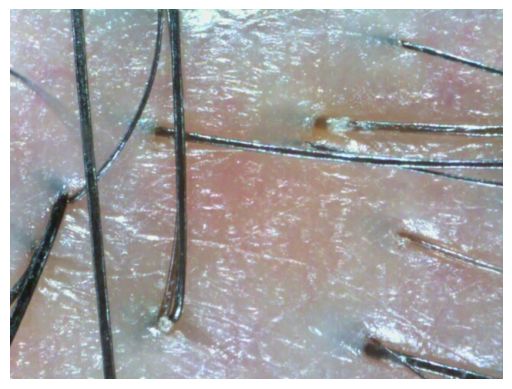

Image width: 640
Image height: 480


In [25]:
# 첫 번째 이미지 파일 경로
first_image_path = os.path.join(training_image_directory, random_training_image_list[0])
print(first_image_path)

# 이미지 열기
image = Image.open(first_image_path)

# 이미지 보여주기
plt.imshow(image)
plt.axis('off')  # 축 제거
plt.show()

# 이미지의 픽셀 크기 출력
image_width, image_height = image.size
print("Image width:", image_width)
print("Image height:", image_height)

/content/drive/MyDrive/Colab Notebooks/Training/image/2585_A2LEBJJDE001302_1602909223859_4_LH.jpg


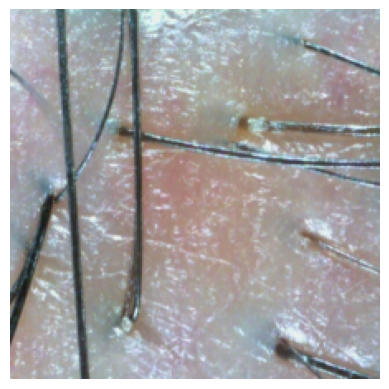

Image width: 224
Image height: 224


In [28]:
# GPU 사용을 위한 장치 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 첫 번째 이미지 파일 경로
first_image_path = os.path.join(training_image_directory, random_training_image_list[0])
print(first_image_path)

# 이미지 열기
image = Image.open(first_image_path).convert("RGB")

# Transform 설정
target_size = (224, 224)
transform = transforms.Compose([
    transforms.Resize(target_size),
    transforms.ToTensor()
])

# 이미지를 GPU로 이동하고 리사이즈
image_tensor = transform(image).unsqueeze(0).to(device)

# Tensor를 다시 PIL 이미지로 변환
resized_image = transforms.ToPILImage()(image_tensor.squeeze(0).cpu())

# 리사이즈된 이미지 보여주기
plt.imshow(resized_image)
plt.axis('off')  # 축 제거
plt.show()

# 이미지의 픽셀 크기 출력
image_width, image_height = resized_image.size
print("Image width:", image_width)
print("Image height:", image_height)

In [38]:
def create_dataframe(image_dir, label_dir, image_list, label_list):
    data = []
    for image_file, label_file in zip(image_list, label_list):
        image_path = os.path.join(image_dir, image_file)
        label_path = os.path.join(label_dir, label_file)

        with open(label_path, 'r') as f:
            try:
                label_data = json.load(f)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON file {label_path}: {e}")
                continue

        # 'image file name'과 'value6' 값 추출
        value_6 = label_data.get('value_6', None)
        data.append({'image_file_name': image_path, 'value_6': value_6})

    return pd.DataFrame(data)

In [39]:
# DataFrame 생성
training_df = create_dataframe(training_image_directory, training_label_directory, random_training_image_list, random_training_label_list)
validation_df = create_dataframe(validation_image_directory, validation_label_directory, val_images, val_labels)
test_df = create_dataframe(validation_image_directory, validation_label_directory, test_images, test_labels)

Error decoding JSON file /content/drive/MyDrive/Colab Notebooks/Training/label/7418_A2LEBJJDE00080C_1606267394171_5_RH.json: Expecting value: line 1 column 1 (char 0)


In [40]:
training_df.head()
validation_df.head()
test_df.head()

,image_file_name,value_6
0,/content/drive/MyDrive/Colab Notebooks/Validat...,1
1,/content/drive/MyDrive/Colab Notebooks/Validat...,1
2,/content/drive/MyDrive/Colab Notebooks/Validat...,1
3,/content/drive/MyDrive/Colab Notebooks/Validat...,1
4,/content/drive/MyDrive/Colab Notebooks/Validat...,2


In [41]:
# 데이터프레임 확인
print("Training DataFrame length:", len(training_df))
print("Validation DataFrame length:", len(validation_df))
print("Test DataFrame length:", len(test_df))

print("\nTraining DataFrame class distribution:")
print(training_df['value_6'].value_counts())

print("\nValidation DataFrame class distribution:")
print(validation_df['value_6'].value_counts())

print("\nTest DataFrame class distribution:")
print(test_df['value_6'].value_counts())

Training DataFrame length: 1799
Validation DataFrame length: 180
Test DataFrame length: 180

Training DataFrame class distribution:
value_6
1    1294
2     386
3      77
0      42
Name: count, dtype: int64

Validation DataFrame class distribution:
value_6
1    128
2     39
0     10
3      3
Name: count, dtype: int64

Test DataFrame class distribution:
value_6
1    139
2     30
0      8
3      3
Name: count, dtype: int64


In [42]:
# 데이터 증강 설정
transform = transforms.Compose([
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(),
    transforms.ToTensor()
])

In [45]:
# 사용자 정의 Dataset 클래스
class CustomDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image_path = self.df.iloc[idx]['image_file_name']
        image = Image.open(image_path).convert("RGB")
        label = self.df.iloc[idx]['value_6']
        if self.transform:
            image = self.transform(image)
        return image, label

In [46]:
# GPU 사용을 위한 장치 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 데이터 증강 함수
def augment_data(df, class_id, target_count, output_directory):
    class_df = df[df['value_6'] == class_id]
    augmented_images = []
    dataset = CustomDataset(class_df, transform=transform)
    dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

    count = 0
    for images, labels in dataloader:
        images = images.to(device)
        for image in images:
            count += 1
            new_image_path = os.path.join(output_directory, f"{os.path.splitext(class_df.iloc[0]['image_file_name'])[0]}_aug_{count}.jpg")
            new_image = transforms.ToPILImage()(image.cpu())
            new_image.save(new_image_path)
            augmented_images.append({'image_file_name': new_image_path, 'value_6': class_id})
            if count >= target_count:
                break
        if count >= target_count:
            break
    return pd.DataFrame(augmented_images)

In [47]:
# 증강된 데이터를 저장할 디렉토리 설정
output_directory = resized_image_directory1

# 불균형 해결을 위한 데이터 증강
max_class_count = max(training_df['value_6'].value_counts())
augmented_data = []
for class_id in training_df['value_6'].unique():
    class_count = training_df['value_6'].value_counts()[class_id]
    if class_count < max_class_count:
        augmented_df = augment_data(training_df, class_id, max_class_count - class_count, output_directory)
        augmented_data.append(augmented_df)
if augmented_data:
    augmented_df = pd.concat(augmented_data)
    training_df = pd.concat([training_df, augmented_df]).reset_index(drop=True)

print("데이터 증강 및 저장 완료")

데이터 증강 완료


In [48]:
# 데이터프레임 확인
print("Training DataFrame length:", len(training_df))
print("Validation DataFrame length:", len(validation_df))
print("Test DataFrame length:", len(test_df))

print("\nTraining DataFrame class distribution:")
print(training_df['value_6'].value_counts())

print("\nValidation DataFrame class distribution:")
print(validation_df['value_6'].value_counts())

print("\nTest DataFrame class distribution:")
print(test_df['value_6'].value_counts())

Training DataFrame length: 2304
Validation DataFrame length: 180
Test DataFrame length: 180

Training DataFrame class distribution:
value_6
1    1294
2     772
3     154
0      84
Name: count, dtype: int64

Validation DataFrame class distribution:
value_6
1    128
2     39
0     10
3      3
Name: count, dtype: int64

Test DataFrame class distribution:
value_6
1    139
2     30
0      8
3      3
Name: count, dtype: int64


In [54]:
# value_6 열을 정수형으로 변환
training_df['value_6'] = training_df['value_6'].astype(int)
validation_df['value_6'] = validation_df['value_6'].astype(int)
test_df['value_6'] = test_df['value_6'].astype(int)

# 데이터프레임을 원-핫 인코딩
training_df = pd.get_dummies(training_df, columns=['value_6'], prefix='class')
validation_df = pd.get_dummies(validation_df, columns=['value_6'], prefix='class')
test_df = pd.get_dummies(test_df, columns=['value_6'], prefix='class')

# 결과 확인
print("\nTraining DataFrame after one-hot encoding:")
print(training_df.head())

print("\nValidation DataFrame after one-hot encoding:")
print(validation_df.head())

print("\nTest DataFrame after one-hot encoding:")
print(test_df.head())


KeyError: 'value_6'

In [55]:
import pickle

# 데이터프레임 저장 경로
save_path = '/content/drive'

# training_df, validation_df, test_df 저장
with open(save_path + 'training_df.pickle', 'wb') as f:
    pickle.dump(training_df, f)

with open(save_path + 'validation_df.pickle', 'wb') as f:
    pickle.dump(validation_df, f)

with open(save_path + 'test_df.pickle', 'wb') as f:
    pickle.dump(test_df, f)

In [56]:
import pickle

# 저장된 데이터프레임 불러오기
load_path = '/content/drive'

with open(load_path + 'training_df.pickle', 'rb') as f:
    training_df = pickle.load(f)

with open(load_path + 'validation_df.pickle', 'rb') as f:
    validation_df = pickle.load(f)

with open(load_path + 'test_df.pickle', 'rb') as f:
    test_df = pickle.load(f)